# Agenda
Using SVD to condese GP bitmaps.



In [1]:
# Installing Libraries (if not installed)
#!pip3 install matplotlib
#!pip3 install scikit-learn
#!pip3 install seaborn
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install so4gp
#!pip3 install scipy
#!pip3 install sympy

## 1.2 Import libraries <a name="lib-import"></a>

In [113]:
# Importing Libraries
import pandas as pd
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import sympy
import scipy


from scipy.sparse import csgraph, csr_matrix
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import TruncatedSVD as tsvd
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, completeness_score,v_measure_score
from numpy import linalg as la

In [3]:
import so4gp as sgp

In [40]:
ds = sgp.DataGP('data\DATASET.csv')
#gp_map = so.get_bin_arr(ds, 0)
X0 = sgp.gibitmap(ds, 0)
X1 = sgp.gibitmap(ds, 1)
X2 = sgp.gibitmap(ds, 2)
X3 = sgp.gibitmap(ds, 3)

print(X0)
print(X1)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [1 1 1 1 0]]
[[0 1 0 1 0]
 [0 0 0 1 0]
 [1 1 0 1 0]
 [0 0 0 0 0]
 [1 1 1 1 0]]


In [5]:
U0, S0, VT0 = svd(X0)
U1, S1, VT1 = svd(X1)
print(S0)

[2.87938524 1.         0.65270364 0.53208889 0.        ]


In [6]:
print(S1)

[2.87938524 1.         0.65270364 0.53208889 0.        ]


In [7]:
U1.shape

(5, 5)

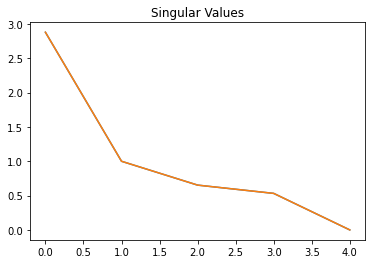

In [8]:
plt.figure(1)
plt.plot(S0)
plt.plot(S1)
plt.title('Singular Values')
plt.show()

In [9]:
U1approx = U1[:,:3] 
U1approx.shape


(5, 3)

In [10]:
S1approx = np.diag(S1)[0:3,:3]
S1approx.shape


(3, 3)

In [11]:
VT1approx = VT1[:3,:]
VT1approx.shape


(3, 5)

In [12]:
Xapprox = U1[0:3,:3] @ np.diag(S1)[0:3,:3] @ VT1[:3,:3]  # 3x3 Matirx
X0approx = U0[:,:3] @ np.diag(S0)[0:3,:3] @ VT0[:3,:]
X1approx = U1[:,:3] @ np.diag(S1)[0:3,:3] @ VT1[:3,:]
print(Xapprox)
print(X0approx)

[[ 0.          0.94800988  1.07965349]
 [ 0.          0.13164361  0.79831028]
 [ 0.         -0.1496996   0.22935309]]
[[-7.08655335e-17  5.22968647e-17  5.27030230e-17 -2.74204222e-17
   0.00000000e+00]
 [ 9.48009876e-01  1.31643615e-01 -1.49699595e-01  9.77094713e-02
   0.00000000e+00]
 [ 1.07965349e+00  7.98310281e-01  2.29353086e-01 -1.49699595e-01
   0.00000000e+00]
 [ 9.29953896e-01  1.17736296e+00  7.98310281e-01  1.31643615e-01
   0.00000000e+00]
 [ 1.02766337e+00  9.29953896e-01  1.07965349e+00  9.48009876e-01
   0.00000000e+00]]


In [13]:
print(X1approx)

[[ 0.          0.94800988  1.07965349  0.9299539   1.02766337]
 [ 0.          0.13164361  0.79831028  1.17736296  0.9299539 ]
 [ 0.         -0.1496996   0.22935309  0.79831028  1.07965349]
 [ 0.          0.09770947 -0.1496996   0.13164361  0.94800988]
 [ 0.          0.          0.          0.          0.        ]]


In [14]:
U = tsvd(n_components=3)
R = U.fit(X0)
R

TruncatedSVD(n_components=3)

In [15]:
R = U.fit_transform(X0)
R

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.56538502e-01, -5.77350269e-01,  4.28525073e-01],
       [ 1.23388877e+00, -5.77350269e-01, -1.48825196e-01],
       [ 1.66241384e+00, -1.11022302e-16, -3.76838625e-01],
       [ 1.89042727e+00,  5.77350269e-01,  2.79699877e-01]])

# Bitmap to Grayscale/RGB Image

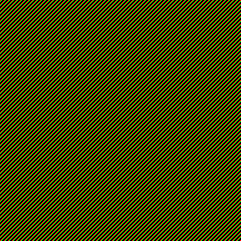

In [16]:
from PIL import Image

size=241
arr = np.zeros((size,size,3))
arr

arr[:,:,0] = [[255]*size]*size
arr[:,:,1] = [[255]*size]*size
arr[:,:,2] = [[0]*size]*size

img = Image.fromarray(arr.astype(int), 'RGB')
img

In [17]:
im = Image.fromarray((X1*255).astype(int))
im

In [18]:
a = [[255]*size]*size
a = np.array(a)
a.shape

(241, 241)

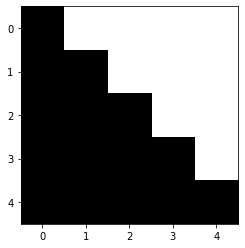

In [19]:
from matplotlib.image import imread
A = imread('data/dog.jpg')
A.shape

X = np.mean(A, -1)  # Convert from RGB to Grayscale
X.shape
img = plt.imshow(X1)
img.set_cmap('gray')
img

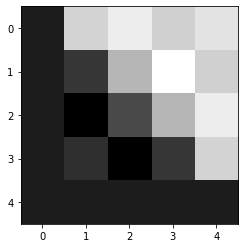

In [20]:
U, S, VT = svd(X)
# S = np.diag(S)
Xapprox = U[:,:10] @ np.diag(S)[0:10,:10] @ VT[:10,:]


img = plt.imshow(X1approx)
img.set_cmap('gray')
img

# Similarity Functions

# Gaussian Similarity Function

In [21]:
# this is an NxD matrix, where N is number of items and D its dimensionalites
size = 5
s = 1  # sigma
#X = np.array(ds.data.T[0], dtype=int)
X = np.array(ds.data.T, dtype=int)
#X = X1 #np.zeros((size,size))
pairwise_dists = squareform(pdist(X, 'euclidean'))
K = np.exp(-pairwise_dists ** 2 / s ** 2)
K

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 7.78113224e-20, 2.89464031e-63,
        3.44247711e-14, 1.02618796e-10],
       [0.00000000e+00, 7.78113224e-20, 1.00000000e+00, 1.09276566e-73,
        4.97870684e-02, 6.30511676e-16],
       [0.00000000e+00, 2.89464031e-63, 1.09276566e-73, 1.00000000e+00,
        5.81404049e-62, 1.08063928e-30],
       [0.00000000e+00, 3.44247711e-14, 4.97870684e-02, 5.81404049e-62,
        1.00000000e+00, 2.06115362e-09],
       [0.00000000e+00, 1.02618796e-10, 6.30511676e-16, 1.08063928e-30,
        2.06115362e-09, 1.00000000e+00]])

In [22]:
print(X1)

[[0 1 1 1 1]
 [0 0 1 1 1]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]]


In [23]:
D = np.array(ds.data.T, dtype=int)
X = np.array(np.diag(ds.data.T[0]), dtype=int)
X

array([[30,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0],
       [ 0,  0, 40,  0,  0],
       [ 0,  0,  0, 50,  0],
       [ 0,  0,  0,  0, 52]])

# Row Reduced Echelon Form (RREF)
* You need to perform *gaussian elimination* before deriving the RREF

In [24]:
X = X1 
X = D
X

array([[30, 35, 40, 50, 52],
       [ 3,  2,  4,  1,  7],
       [ 1,  2,  2,  1,  1],
       [10,  8,  7,  6,  2],
       [ 2,  2,  2,  2,  2],
       [ 4,  4,  4,  4,  4]])

In [25]:
# find the reduced row echelon form
#X = [[4,0,1],[2,0,2],[3,0,3]]
r = sympy.Matrix(X).rref()
print(r)  

(Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 0]]), (0, 1, 2, 3, 4))


In [100]:

# find the rank of matrix
print("Rank of matrix :",sympy.Matrix(X).rank())

Rank of matrix : 5


# Constructing K-nearest neighbors graph of GP Bitmaps

In [ ]:
# Constructing K-nearest neighbors graph
X = X0
n_neighbors = 2
knn_dist_graph = kneighbors_graph(X=X,
                                 n_neighbors=n_neighbors,
                                 mode='connectivity')
knn_dist_graph.todense()#[0][:,:50]

## Computing Similarity
Based on connectivity (0 or 1)

In [ ]:
# Similarity graph

sigma = 1
similarity_graph = csr_matrix(knn_dist_graph.shape)
nonzeroindices = knn_dist_graph.nonzero()
similarity_graph[nonzeroindices] = np.exp( -np.asarray(knn_dist_graph[nonzeroindices])**2 / 2.0 * sigma**2)
similarity_graph = 0.5 * (similarity_graph + similarity_graph.T)
similarity_graph.todense()#[0][:,:5]

# Spectral Clustering

Data set is the GP bitmaps (X0, X1, ..., Xn). Each attribute generates a GP bitmap.

# Laplacian Matrix (L)

L = D - W

where D is a diagonal matirx di = sum(Wij)

In [ ]:
W = X2
W

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [90]:
# Sum of rows
#D = []
#for r in W:
#    d = np.sum(r)
#    D.append(d)
#D = np.diag(D)
#D

# strength diagonal matrix
D = np.diag(np.sum(W,axis=1))
D

array([[0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [91]:
# Laplacian Matrix

L = D - W
L

array([[ 0,  0,  0,  0,  0],
       [-1,  3,  0, -1, -1],
       [-1,  0,  3, -1, -1],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

In [92]:
L = csgraph.laplacian(W, normed=False)
L

array([[ 2,  0,  0,  0,  0],
       [-1,  0,  0, -1, -1],
       [-1,  0,  0, -1, -1],
       [ 0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  2]])

In [93]:
# Normalized Laplacian Matirx: 

# identity
#I = np.identity(W.shape[0])
# D^{-1/2} matrix
#D_inv_sqrt = la.inv(np.sqrt(D))
#L_norm = I - np.dot(D_inv_sqrt, W).dot(D_inv_sqrt)
#L_norm

L_norm = csgraph.laplacian(W, normed=True)
L_norm

array([[ 1.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.70710678,  0.        , -0.        , -0.70710678, -0.70710678],
       [-0.70710678, -0.        ,  0.        , -0.70710678, -0.70710678],
       [-0.        , -0.        , -0.        ,  1.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        ,  1.        ]])

In [94]:
L1_norm = [[0,0.25,0.2,0.2,0.25,0,0,0,0,0],
      [0.25,0,0.2,0.2,0.25,0,0,0,0,0],
      [0.2,0.2,0,0.17,0.2,0.17,0.17,0,0,0],
      [0.2,0.2,0.17,0,0.2,0.17,0.17,0,0,0],
      [0.25,0.25,0.2,0.2,0,0,0,0,0,0],
      [0,0,0.17,0.17,0,0,0.17,0.2,0.2,0.2],
      [0,0,0.17,0.17,0,0.17,0,0.2,0.2,0.2],
      [0,0,0,0,0,0.2,0.2,0,0.25,0.25],
      [0,0,0,0,0,0.2,0.2,0.25,0,0.25],
      [0,0,0,0,0,0.2,0.2,0.25,0.25,0]]
L1_norn = np.array(L1_norm)
L1_norm

[[0, 0.25, 0.2, 0.2, 0.25, 0, 0, 0, 0, 0],
 [0.25, 0, 0.2, 0.2, 0.25, 0, 0, 0, 0, 0],
 [0.2, 0.2, 0, 0.17, 0.2, 0.17, 0.17, 0, 0, 0],
 [0.2, 0.2, 0.17, 0, 0.2, 0.17, 0.17, 0, 0, 0],
 [0.25, 0.25, 0.2, 0.2, 0, 0, 0, 0, 0, 0],
 [0, 0, 0.17, 0.17, 0, 0, 0.17, 0.2, 0.2, 0.2],
 [0, 0, 0.17, 0.17, 0, 0.17, 0, 0.2, 0.2, 0.2],
 [0, 0, 0, 0, 0, 0.2, 0.2, 0, 0.25, 0.25],
 [0, 0, 0, 0, 0, 0.2, 0.2, 0.25, 0, 0.25],
 [0, 0, 0, 0, 0, 0.2, 0.2, 0.25, 0.25, 0]]

In [95]:
# Compute eigenvalues: w-eigenvalues, v-eigenvector
w, v = la.eig(L)
w, v = la.eig(L_norm)
w

array([0., 0., 1., 1., 1.])

In [96]:
v

array([[ 0.        ,  0.        ,  0.70710678,  0.        ,  0.        ],
       [ 0.        ,  1.        , -0.5       , -0.5       , -0.5       ],
       [ 1.        ,  0.        , -0.5       , -0.5       , -0.5       ],
       [ 0.        ,  0.        ,  0.        ,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.70710678]])

In [97]:
# KMeans of first 2 largest u1, u2
k = 2
U12 = v[:, 0:k]
U12

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.]])

In [98]:
kmeans = KMeans(n_clusters=k, random_state=0)
y_pred = kmeans.fit_predict(U12)
y_pred

array([0, 0, 1, 0, 0])

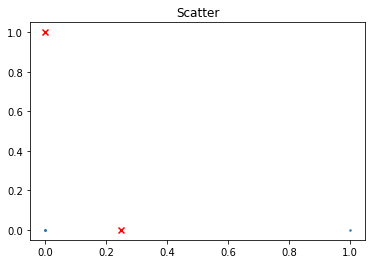

array([[0.  , 0.25],
       [1.  , 0.  ]])

In [99]:
x1 = U12[:, 0]
x2 = U12[:, 1]
#x3 = U12[:, 2]

plt.figure(1)
#plt.ylim(-0.5, 2)
#plt.xlim(-0.5, 2)
plt.scatter(x2, x1, s=2)
#plt.scatter(x2, x3, s=2)
#plt.scatter(U12[:, 2], y, c=y_pred)
#plt.scatter(U12[:, 3], y, c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='red', marker='x')
plt.title('Scatter')
plt.show()

kmeans.cluster_centers_


In [49]:
# Check if cluster_centers of different bitmaps can be used to compute support (AND operation)